In [9]:
import os
import warnings

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

from soma.generators.nmist import NmistGenerator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_sample_size
from soma.util.plot import plot_errors, plot_time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plot_dir = os.path.expanduser('~/Plots/power_sample_size')
os.makedirs(plot_dir, exist_ok=True)

In [102]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [103]:
samples = np.array([100, 250, 500, 2500, 5000, 10000])
repeat = 200

# NMIST

In [114]:
nmist2 = NmistGenerator(2)
nmist3 = NmistGenerator(3)

In [115]:
nmist_results = stat_errors_vs_sample_size(nmist2, nmist3, tests, samples, repeat=repeat)

  0%|          | 0/12 [00:00<?, ?it/s]

In [117]:
nmist_results.to_csv(os.path.join(plot_dir, 'nmist_results_samples.csv'))

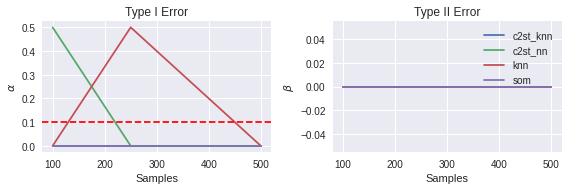

In [116]:
nmist_fig = plot_errors(nmist_results)
nmist_fig.savefig(os.path.join(plot_dir, 'nmist_power_samples.eps'))

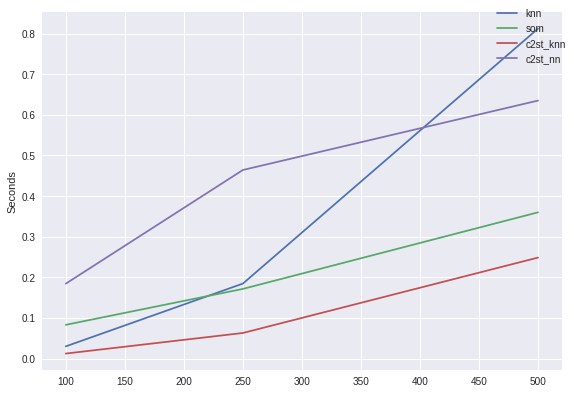

In [22]:
nmist_time = plot_time(samples, nmist_results)
nmist_time.savefig(os.path.join(plot_dir, 'nmist_time_samples.eps'))